<a href="https://colab.research.google.com/github/peachvegetable/STA314-project/blob/master/Exercise_IV__Function_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ states (InputLayer)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ actions (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

Error: 24.061235
Error: 94.976807
Error: 26.901594
Error: 0.001377
Error: 105.104813
Epoch 1 summary — grad_norm: 67.139137
Error: 25.021547
Error: 99.374001
Error: 0.002770
Error: 93.659615
Error: 22.313099
Epoch 2 summary — grad_norm: 19.593910
Error: 0.000003
Error: 21.929615
Error: 87.284691
Error: 24.385117
Error: 96.500694
Epoch 3 summary — grad_norm: 62.319241
Error: 0.000008
Error: 92.750679
Error: 21.680714
Error: 85.845055
Error: 20.246344
Epoch 4 summary — grad_norm: 20.676954
Error: 89.105003
Error: 20.149548
Error: 80.331322
Error: 21.130060
Error: 0.000000
Epoch 5 summary — grad_norm: 0.001178
Error: 20.721695
Error: 0.000458
Error: 84.164337
Error: 19.121216
Error: 76.331779
Epoch 6 summary — grad_norm: 65.083290
Error: 0.000022
Error: 19.629276
Error: 17.576405
Error: 80.398026
Error: 71.692787
Epoch 7 summary — grad_norm: 67.694641
Error: 67.062424
Error: 77.484993
Error: 17.561619
Error: 0.000358
Error: 15.085440
Epoch 8 summary — grad_norm: 23.220501
Error: 0.000159


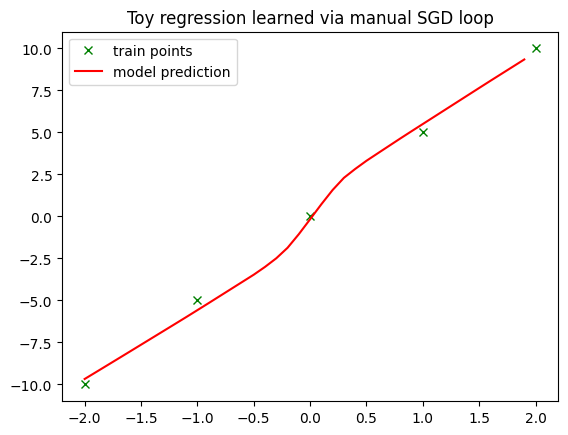

In [1]:
# -*- coding: utf-8 -*-
"""stochastic_gradient_descent_example

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1NNX1DdBoxq0sX_ill6yjCP-vq_QBhb15
"""

import numpy as np
import tensorflow as tf
import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import Adam

# One way of defining a model
#p_inputSpace = 4
#p_outputSpace = 2
#alpha = 0.001
#model=Sequential()
#model.add(Dense(24,input_shape=(p_inputSpace,), activation="relu"))
#model.add(Dense(24, activation="relu"))
#model.add(Dense(p_outputSpace, activation="linear"))
#model.compile(loss="mse", optimizer=Adam(lr=alpha))
#Dense = Fully Connected

# f : R^1 -> R^1
p_inputSpace = 1
p_outputSpace = 1

# Construct a neural network with several layers
# define the model
inputs=keras.Input(shape=(p_inputSpace,),name="states")
x1 = keras.layers.Dense(64,activation="relu")(inputs)
x2 = keras.layers.Dense(64,activation="relu")(x1)
outputs = keras.layers.Dense(p_outputSpace, name="actions")(x2)
model = keras.Model(inputs=inputs, outputs=outputs)

# plot it
keras.utils.plot_model(
    model,
    #to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB", #TB: vertical; LR: hor
    expand_nested=True,
    dpi=96,
)

# print network summary (layers/parameters)
model.summary()

# optimizer and per-prediction error
alpha = 0.001
optimizer=keras.optimizers.SGD(learning_rate=alpha)
f_ppError = keras.losses.MeanSquaredError()

# training data (plotted at the end of this file)
train = np.array([[-2,-10], [-1,-5], [0, 0], [1,5], [2,10]])
x_train = train[:,0]
y_train = train[:,1]
# for stochastic gradient descent, create batches
batch_size = 1
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

last_grads = None

epochs = 40
# Train the neural network by stochastic gradient descent
for epoch in range(epochs):
  #print("\nStart of epoch %d" % (epoch,))
  for step, (x_batch_train,y_batch_train) in enumerate(train_dataset):
    #print(step,x_batch_train,y_batch_train)
#Obtain the gradient of the neural network with respect to its parameters
    with tf.GradientTape() as tape:
      predictions = model(x_batch_train,training=True)
      ppError = f_ppError(y_batch_train,predictions)
    grads = tape.gradient(ppError,model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    print("Error: %f" % float(ppError))

    last_grads = grads

  if last_grads is not None:
    gnorm = tf.linalg.global_norm(last_grads)
    print("Epoch %d summary — grad_norm: %0.6f" % (epoch+1, float(gnorm)))


D=np.arange(-2,2,.1)
R=model.predict(D)
from matplotlib import pyplot as plt
plt.plot(x_train,y_train,'gx',D,R,'r-')


plt.legend(["train points","model prediction"])
plt.show()


Our neural network structure is clearly presented in the table produced by model.summary(): an input layer states with shape (None, 1), followed by two fully connected ReLU hidden layers with 64 units each, and a linear output head actions with shape (None, 1). The parameter counts per layer are 128 (weights 1*64 plus 64 biases), 4,160(64*64 plus 64 biases), and 65 (64*1 plus 1 bias), totaling 4,353 trainable parameters. The Keras model (states → Dense(64, ReLU) → Dense(64, ReLU) → actions (linear)) is exactly the stacked nonlinear feature mappers and linear readout drawn in class and serves as a general piecewise-linear function approximator. The loss decreases over iterations and the prediction curve aligns with the training points, confirming that the forward pass, loss, gradients, and updates are functioning correctly. When migrating to the A-IV controller, we only need to change the input dimensionality to the environment state dimension (CartPole = 4), change the linear output dimensionality to the number of actions, and replace the current MSE target with TD/MC targets. In the logs, the printed global gradient norm grad_norm starts large (Epoch 1 summary — grad_norm: 67.139137) and gradually decreases as the model approaches the target (Epoch 40 summary — grad_norm: 1.856207), which is consistent with convergence; meanwhile the error (here, the MSE) also decreases within the loop, indicating that parameters are being updated and corroborating the lecture's pipeline. For CartPole, we can use the same gradient acquisition and update skeleton, simply substituting the targets with MC/TD and adding ε-greedy and a target network to train a value-based controller. Finally, the figure shows the function-approximation result after SGD training, green points are the training samples and the red curve is the model prediction, the red curve essentially passes through all green points, further confirming the correctness of the preceding procedure.
